Accuracy: 0.6667

Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.83      0.71      0.77         7
           2       0.71      0.80      0.75        15
           3       0.50      0.50      0.50        22
           4       0.61      0.42      0.50        26
           5       0.75      0.88      0.81        17
           6       0.93      0.93      0.93        14
           7       0.71      0.91      0.80        11
           8       0.44      0.36      0.40        11
           9       0.57      0.44      0.50         9
          10       0.86      1.00      0.92         6

    accuracy                           0.67       141
   macro avg       0.67      0.72      0.68       141
weighted avg       0.66      0.67      0.66       141


Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  5  0  0  0  0  0  0  0  0  0]
 [ 2  1 12  0  0  0  0  0  0  0  0]
 [ 0  0  5 11  6 

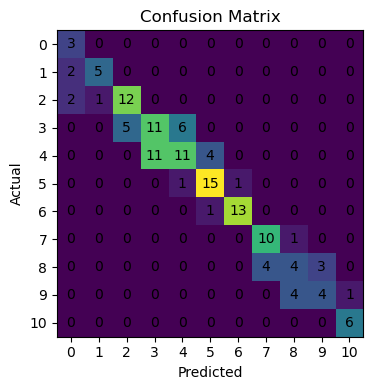

In [3]:
# ==============================
# Autism Dataset: Full ML Pipeline
# ==============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

# ---------- 1) Load & basic clean ----------
df = pd.read_csv("autism.csv")

# (optional) tidy column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

# Ensure target column exists
TARGET_COL = "result"      # <- change here if your target has a different name
if TARGET_COL not in df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found in dataframe columns: {list(df.columns)}")

# Drop rows with missing target
df = df.dropna(subset=[TARGET_COL])

# ---------- 2) Split X / y ----------
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# If target is text labels (e.g., 'yes'/'no'), keep as-is; LogisticRegression can handle it.

# ---------- 3) Identify column types ----------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# ---------- 4) Build preprocessing steps ----------
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())              # scale numerics
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # expands categories safely
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols),
    ],
    remainder="drop"
)

# ---------- 5) Build full model pipeline ----------
# class_weight="balanced" helps when classes are imbalanced
model = LogisticRegression(max_iter=5000, solver="lbfgs", class_weight="balanced", n_jobs=None)

clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("logreg", model)
])

# ---------- 6) Train / test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- 7) Fit & predict ----------
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ---------- 8) Evaluate ----------
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# ---------- 9) Confusion matrix (optional plot) ----------
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
print("\nConfusion Matrix:\n", cm)

# Simple matplotlib visualization
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(cm, interpolation="nearest")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks(range(len(np.unique(y_test))))
ax.set_yticks(range(len(np.unique(y_test))))
ax.set_xticklabels(np.unique(y_test))
ax.set_yticklabels(np.unique(y_test))

# annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice autism  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

  country_of_res used_app_before result     age_desc relation Class/

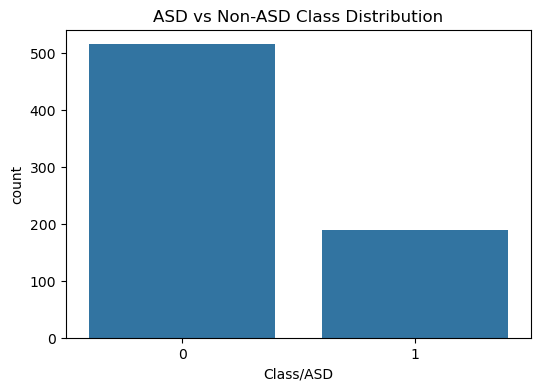

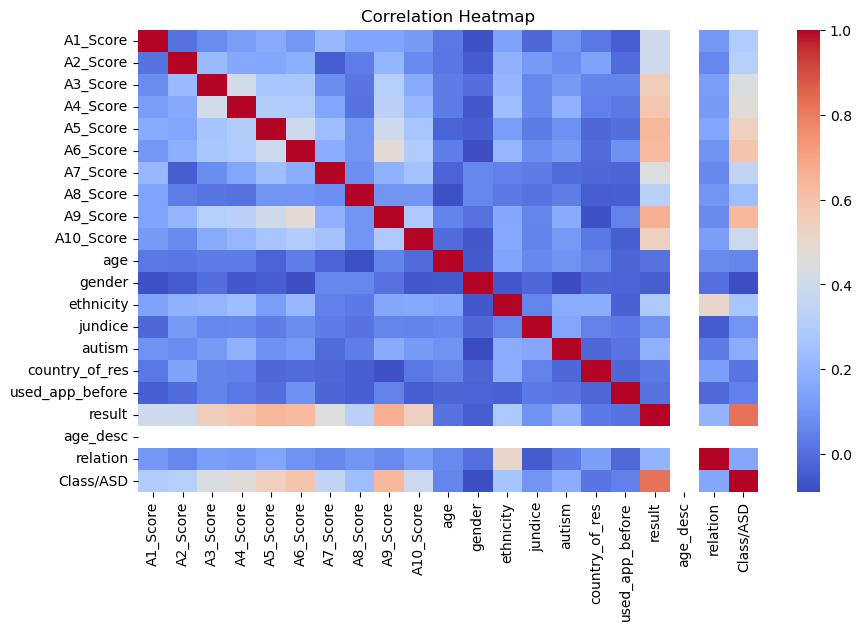


Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Decision Tree
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00  

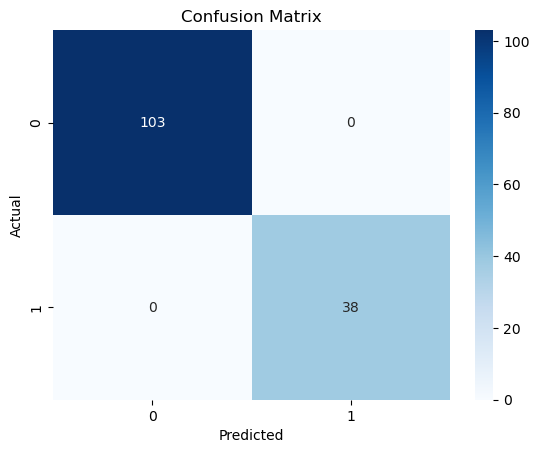


✅ Best model saved as asd_model.pkl
SHAP not supported for this model: No module named 'shap'


In [4]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv("Autism.csv")  # replace with your dataset filename
print(df.head())
print(df.info())

# ================================
# 3. Preprocessing
# ================================
# Handle missing values
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ================================
# 4. Exploratory Data Analysis (EDA)
# ================================
plt.figure(figsize=(6,4))
sns.countplot(x="Class/ASD", data=df)
plt.title("ASD vs Non-ASD Class Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ================================
# 5. Train Multiple Models
# ================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", probability=True, random_state=42)
}

results = []
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append({"Model": name, "Accuracy": acc})
    
    print(f"\n{name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, preds))
    
    if acc > best_score:
        best_score = acc
        best_model = model

results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)

# ================================
# 6. Confusion Matrix for Best Model
# ================================
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================
# 7. Save the Best Model
# ================================
joblib.dump(best_model, "asd_model.pkl")
print("\n✅ Best model saved as asd_model.pkl")

# ================================
# 8. SHAP Explainability (Only for Tree Models)
# ================================
try:
    import shap
    explainer = shap.Explainer(best_model, X_train)
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.show()
except Exception as e:
    print("SHAP not supported for this model:", e)